In [144]:


#imports
#imports
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from pandas import DataFrame
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn import under_sampling, over_sampling
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import  GaussianNB, BernoulliNB
from tensorflow import keras
from sklearn.metrics import accuracy_score
from datetime import datetime
from tensorflow.keras.layers.experimental import preprocessing   
from sklearn.tree import DecisionTreeRegressor
import sklearn.tree as SKTree
from sklearn.metrics import accuracy_score



In [145]:

# Definindo sementes para reprodutibilidade
np.random.seed(1)
tf.random.set_seed(1)
tf.config.experimental.enable_op_determinism()

def regressaoLinear(X_train, Y_train, X_test, Y_test):
    # Normalização dos dados de entrada
    normalizer = preprocessing.Normalization()
    normalizer.adapt(X_train)

    # Definição do modelo de regressão linear com inicialização determinística
    model = keras.Sequential([
        normalizer,
        layers.Dense(1, kernel_initializer=tf.keras.initializers.GlorotUniform(seed=1))
    ])

    # Compilação do modelo
    model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.1), loss='mean_absolute_error')

    # Treinamento do modelo
    history = model.fit(
        X_train, Y_train,
        epochs=100,
        validation_split=0.3,
        verbose=0
    )

    # Plotando as perdas (train e validation)
    plt.plot(history.history['loss'], label='Loss de Treinamento')
    plt.plot(history.history['val_loss'], label='Loss de Validação')
    plt.xlabel('Épocas')
    plt.ylabel('Erro')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Predição e cálculo do erro médio absoluto
    y_pred = model.predict(X_test).reshape(-1)
    print("Erro médio absoluto Regressão linear:", mean_absolute_error(Y_test, y_pred))
    print("Erro MSE Regressao linear:", mean_squared_error(Y_test, y_pred))

    # Histograma dos erros
    error = y_pred - Y_test
    plt.hist(error, bins=15)
    plt.title('Distribuição dos Erros')
    plt.xlabel('Erro')
    plt.ylabel('Frequência')
    plt.show()

    # Gráfico de resíduos
    plt.scatter(y_pred, error)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel('Valores Preditos')
    plt.ylabel('Resíduos')
    plt.title('Gráfico de Resíduos - Regressão Linear')
    plt.show()


def redeNeural(X_train, Y_train, X_test, Y_test):
    # Normalização dos dados de entrada
    normalizer = preprocessing.Normalization()
    normalizer.adapt(X_train)

    # Definição do modelo de rede neural com inicialização determinística
    model = keras.Sequential([
        normalizer,
        layers.Dense(10, kernel_initializer=tf.keras.initializers.GlorotUniform(seed=1)),
        layers.Dense(7, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=1)),
        layers.Dense(5, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=1)),
        layers.Dense(1, kernel_initializer=tf.keras.initializers.GlorotUniform(seed=1))
    ])

    # Exibe o resumo do modelo
    model.summary()

    # Compilação do modelo
    model.compile(optimizer='adam', loss='mean_absolute_error')

    # Treinamento do modelo
    history = model.fit(
        X_train, Y_train,
        epochs=50,
        validation_split=0.3,
        batch_size=8,
        verbose=0
    )

    # Plotando as perdas (train e validation)
    plt.plot(history.history['loss'], label='Loss de Treinamento')
    plt.plot(history.history['val_loss'], label='Loss de Validação')
    plt.xlabel('Épocas')
    plt.ylabel('Erro')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Predição e cálculo do erro médio absoluto
    y_pred = model.predict(X_test).reshape(-1)
    print("Erro médio absoluto Rede neural:", mean_absolute_error(Y_test, y_pred))
    print("Erro MSE Rede neural:", mean_squared_error(Y_test, y_pred))


    # Histograma dos erros
    error = y_pred - Y_test
    plt.hist(error, bins=15)
    plt.title('Distribuição dos Erros')
    plt.xlabel('Erro')
    plt.ylabel('Frequência')
    plt.show()

    # Gráfico de resíduos
    plt.scatter(y_pred, error)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel('Valores Preditos')
    plt.ylabel('Resíduos')
    plt.title('Gráfico de Resíduos - Rede Neural')
    plt.show()

    
def decisionTree(X_train, Y_train, X_test, Y_test):
    scaler = StandardScaler()
    x_train_normalize = scaler.fit_transform(X_train)
    x_test_normalize = scaler.transform(X_test)
    
    # Treinamento do modelo de Decision Tree
    reg = DecisionTreeRegressor(max_depth=8)
    reg.fit(x_train_normalize, Y_train)
    
    # Predição e cálculo do erro
    y_pred = reg.predict(x_test_normalize)
    mse = mean_squared_error(Y_test, y_pred)
    mae = mean_absolute_error(Y_test, y_pred)
    
    print(f"Test MSE Decision Tree = {mse}")
    print(f"Test MAE Decision Tree = {mae}")
    # SKTree.plot_tree(reg)



In [146]:
#utils
def shuffle(X, y):
    return train_test_split(
    X, y, test_size=0.33, random_state=1, shuffle=True)


In [147]:
# def loadDataset()-> DataFrame:
#     return pd.read_csv('dataset/car data.csv')

# def loadDataset2()-> DataFrame:
#     return pd.read_csv('dataset/car data2.csv')


def loadDataset()-> DataFrame:
    return pd.read_csv('dataset/CAR DETAILS FROM CAR DEKHO.csv')

In [148]:

dt = loadDataset()
display(dt.dtypes)
display(len(dt))

ano_atual = datetime.now().year
age =dt['year'].apply(lambda x:ano_atual-x)
dt.drop('year',axis=1,inplace=True)
#transformo a coluna ano em idade do carro
dt.insert(0,'Age',age);

display(dt.describe())
#vejo se vai ter nulls
display(dt.isnull().sum())
display(dt.describe())


# display(dt['selling_price'].idxmax())
# display(dt.selling_price.mean())
# nada null

name             object
year              int64
selling_price     int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner            object
dtype: object

4340

,Age,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,10.909217,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,4.000000,2.000000e+04,1.000000
25%,8.000000,2.087498e+05,35000.000000
50%,10.000000,3.500000e+05,60000.000000
75%,13.000000,6.000000e+05,90000.000000
max,32.000000,8.900000e+06,806599.000000


Age              0
name             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

,Age,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,10.909217,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,4.000000,2.000000e+04,1.000000
25%,8.000000,2.087498e+05,35000.000000
50%,10.000000,3.500000e+05,60000.000000
75%,13.000000,6.000000e+05,90000.000000
max,32.000000,8.900000e+06,806599.000000


True

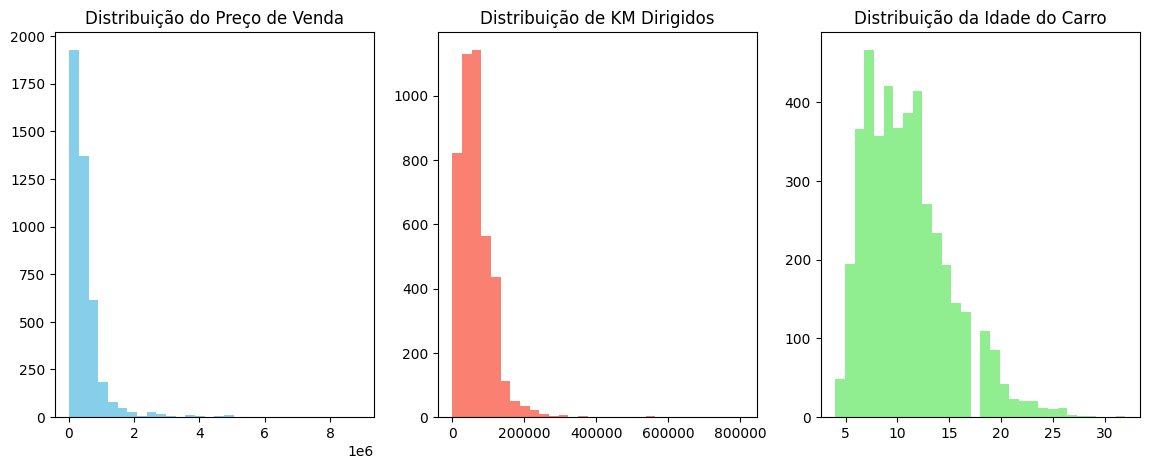

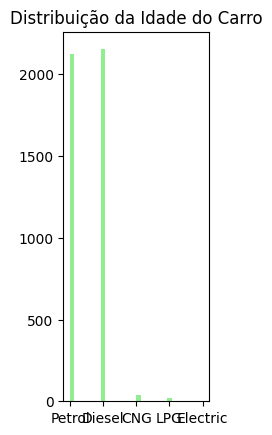

In [149]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 3, 1)
plt.hist(dt['selling_price'], bins=30, color='skyblue')
plt.title('Distribuição do Preço de Venda')
display(dt['selling_price'].mean()<600_000)

plt.subplot(1, 3, 2)
plt.hist(dt['km_driven'], bins=30, color='salmon')
plt.title('Distribuição de KM Dirigidos')

plt.subplot(1, 3, 3)
plt.hist(dt['Age'], bins=30, color='lightgreen')
plt.title('Distribuição da Idade do Carro')
plt.show()


plt.subplot(1, 3, 3)
plt.hist(dt['fuel'], bins=30, color='lightgreen')
plt.title('Distribuição da Idade do Carro')
plt.show()

C:\Users\marco\AppData\Local\Temp\ipykernel_3536\371276861.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='fuel', data=dt, palette='Set2')
C:\Users\marco\AppData\Local\Temp\ipykernel_3536\371276861.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='seller_type', data=dt, palette='Set3')
C:\Users\marco\AppData\Local\Temp\ipykernel_3536\371276861.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='transmission', data=dt, palette='Set1')
C:\Users\marco\AppData\Local\Temp\ipykernel_3536\371276861.py:16: FutureWarning: 

Pass

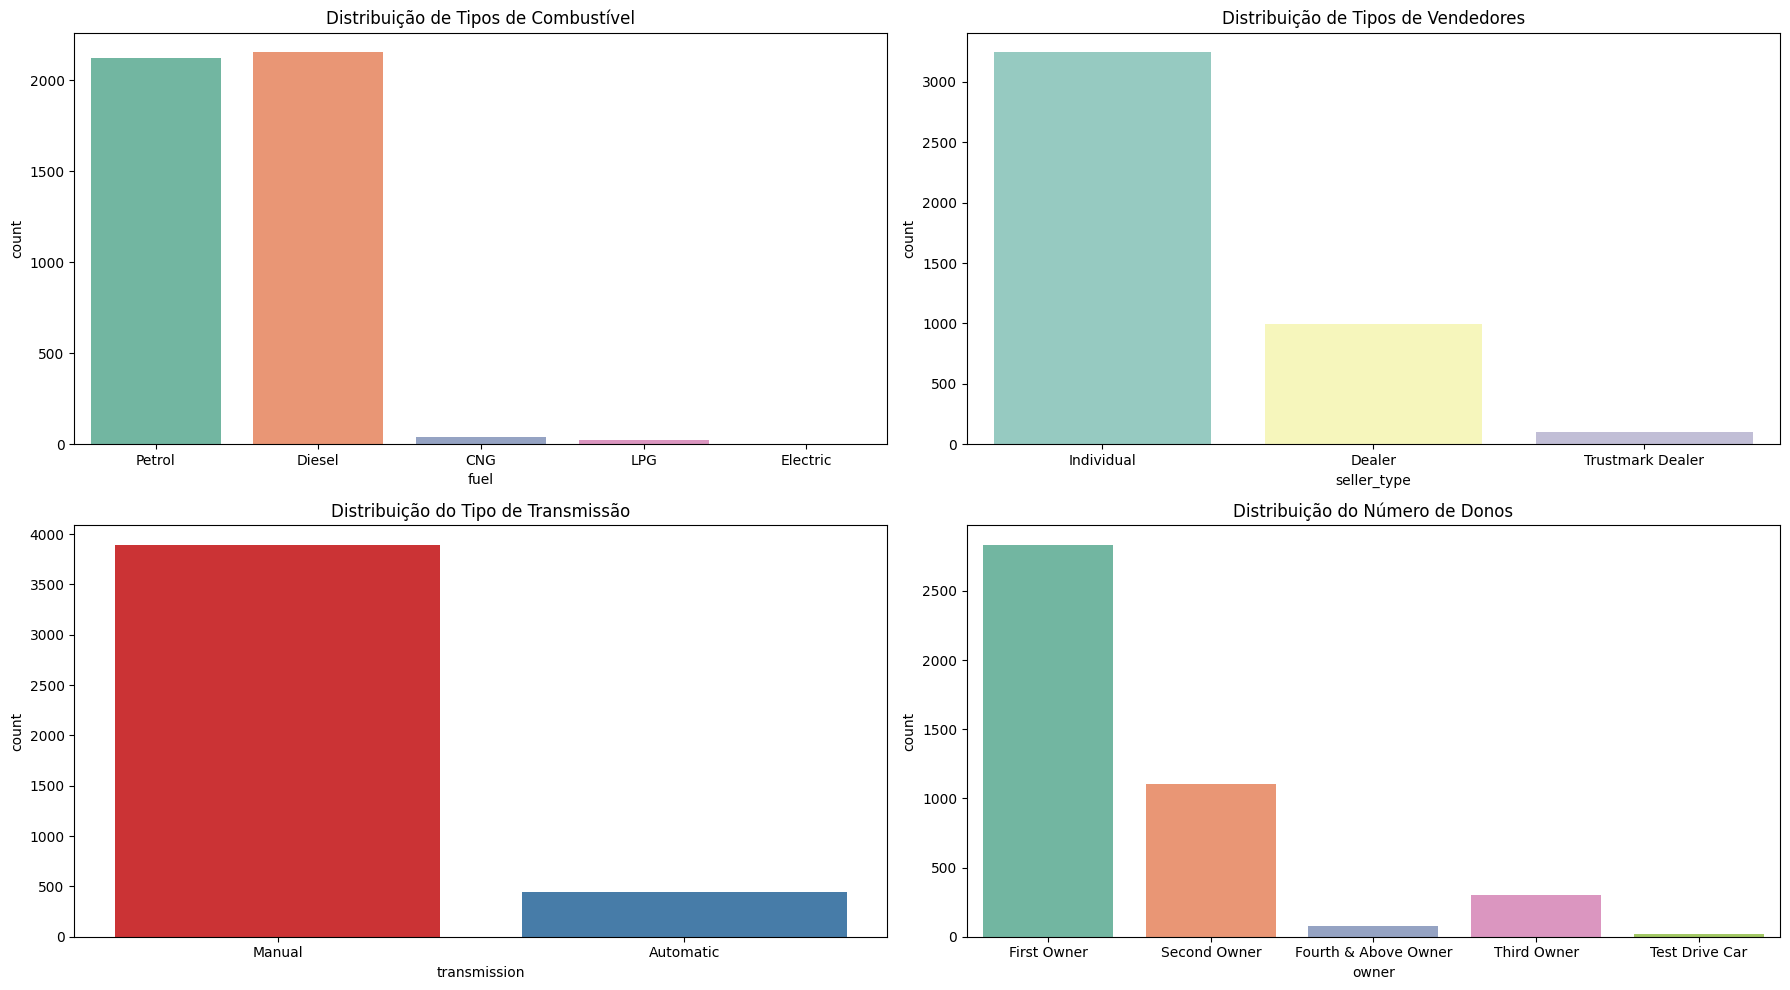

In [150]:
plt.figure(figsize=(18, 10))

plt.subplot(2, 2, 1)
sns.countplot(x='fuel', data=dt, palette='Set2')
plt.title('Distribuição de Tipos de Combustível')

plt.subplot(2, 2, 2)
sns.countplot(x='seller_type', data=dt, palette='Set3')
plt.title('Distribuição de Tipos de Vendedores')

plt.subplot(2, 2, 3)
sns.countplot(x='transmission', data=dt, palette='Set1')
plt.title('Distribuição do Tipo de Transmissão')

plt.subplot(2, 2, 4)
sns.countplot(x='owner', data=dt, palette='Set2')
plt.title('Distribuição do Número de Donos')
plt.tight_layout()
plt.show()

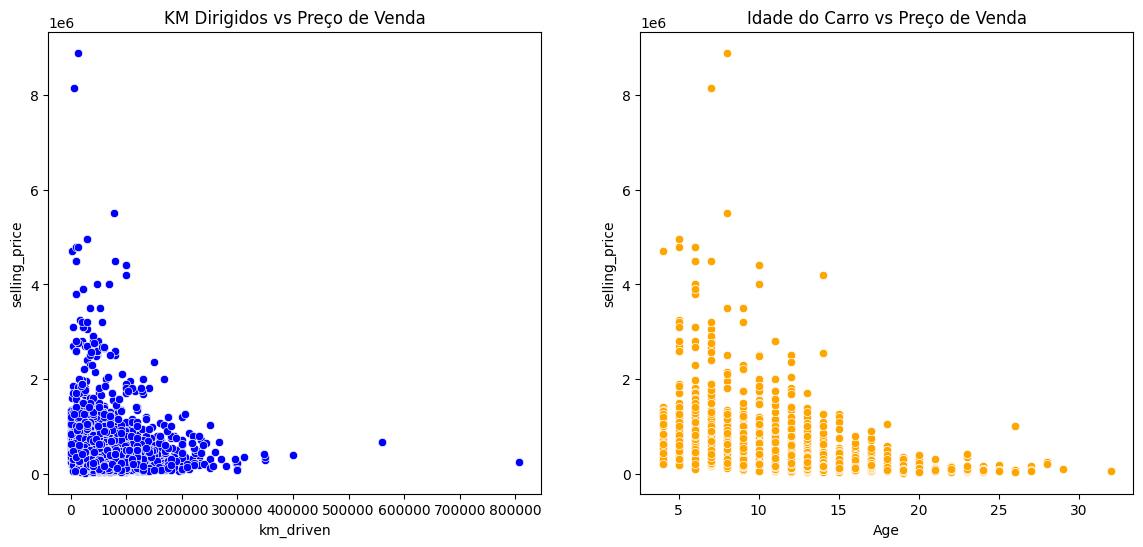

In [151]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='km_driven', y='selling_price', data=dt, color='blue')
plt.title('KM Dirigidos vs Preço de Venda')

plt.subplot(1, 2, 2)
sns.scatterplot(x='Age', y='selling_price', data=dt, color='orange')
plt.title('Idade do Carro vs Preço de Venda')

plt.show()

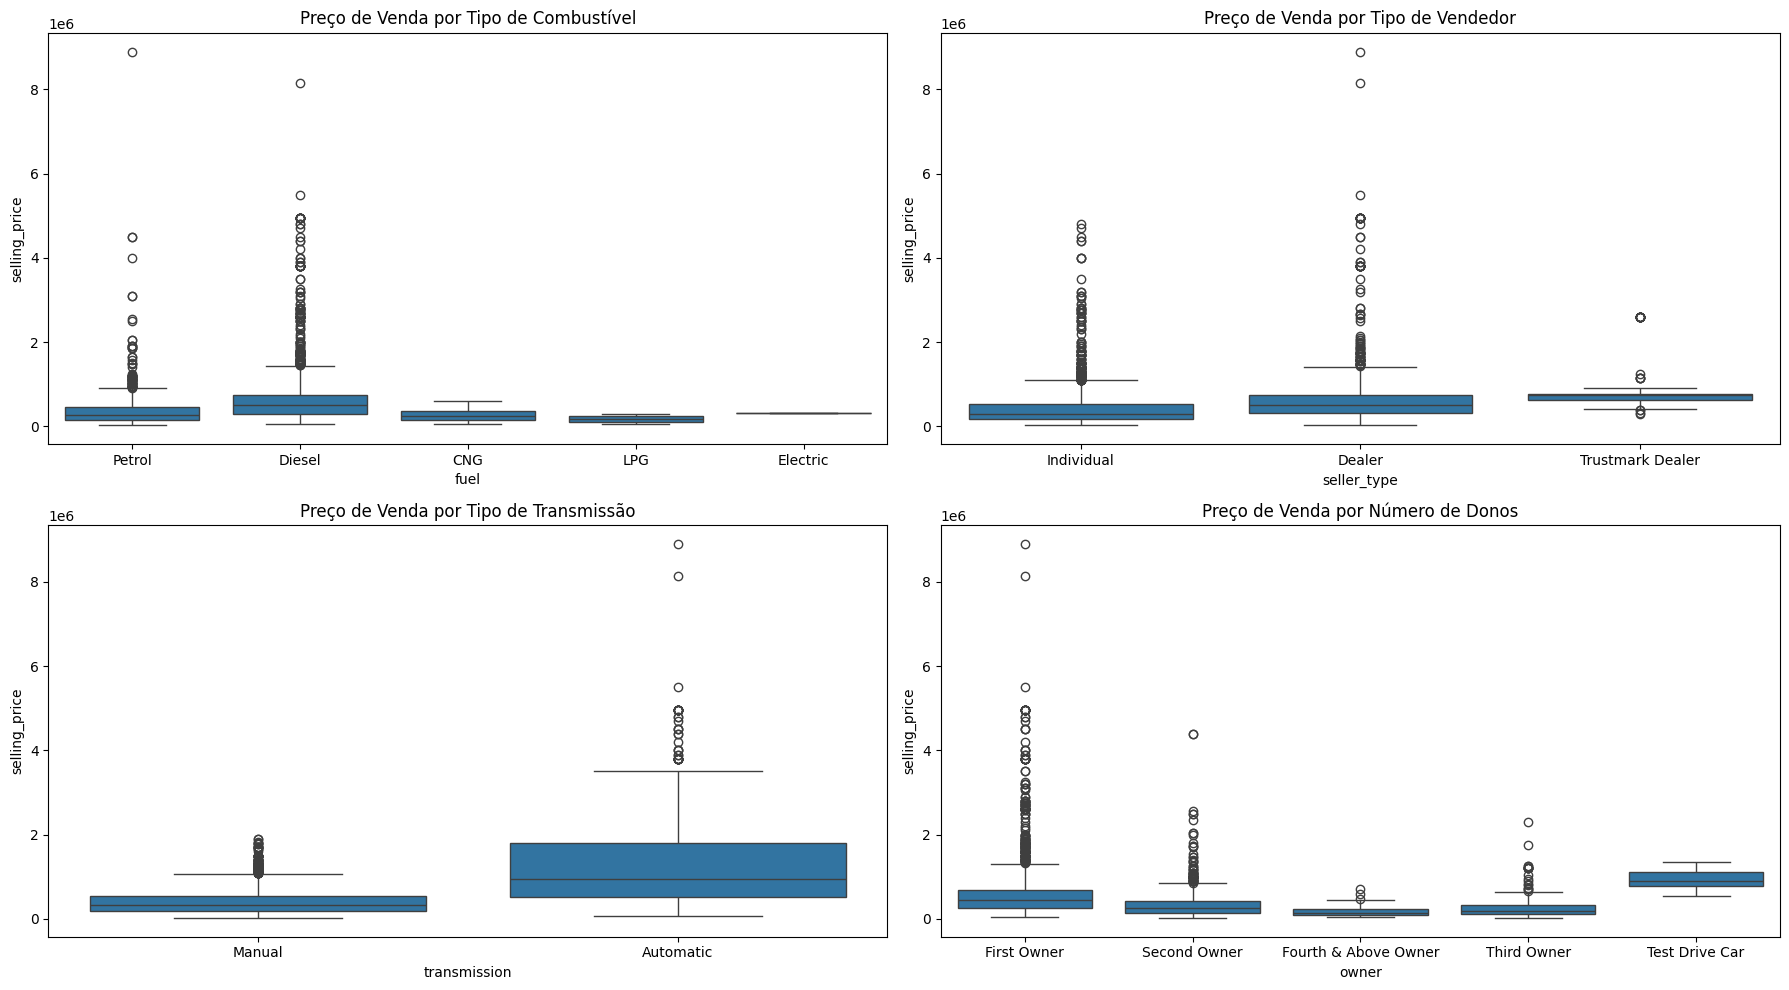

In [152]:
plt.figure(figsize=(18, 10))

plt.subplot(2, 2, 1)
sns.boxplot(x='fuel', y='selling_price', data=dt)
plt.title('Preço de Venda por Tipo de Combustível')

plt.subplot(2, 2, 2)
sns.boxplot(x='seller_type', y='selling_price', data=dt)
plt.title('Preço de Venda por Tipo de Vendedor')

plt.subplot(2, 2, 3)
sns.boxplot(x='transmission', y='selling_price', data=dt)
plt.title('Preço de Venda por Tipo de Transmissão')

plt.subplot(2, 2, 4)
sns.boxplot(x='owner', y='selling_price', data=dt)
plt.title('Preço de Venda por Número de Donos')
plt.tight_layout()
plt.show()

Age                              int64
name                            object
selling_price                    int64
km_driven                        int64
fuel_Diesel                      int32
fuel_Electric                    int32
fuel_LPG                         int32
fuel_Petrol                      int32
seller_type_Individual           int32
seller_type_Trustmark Dealer     int32
transmission_Manual              int32
owner_Fourth & Above Owner       int32
owner_Second Owner               int32
owner_Test Drive Car             int32
owner_Third Owner                int32
dtype: object

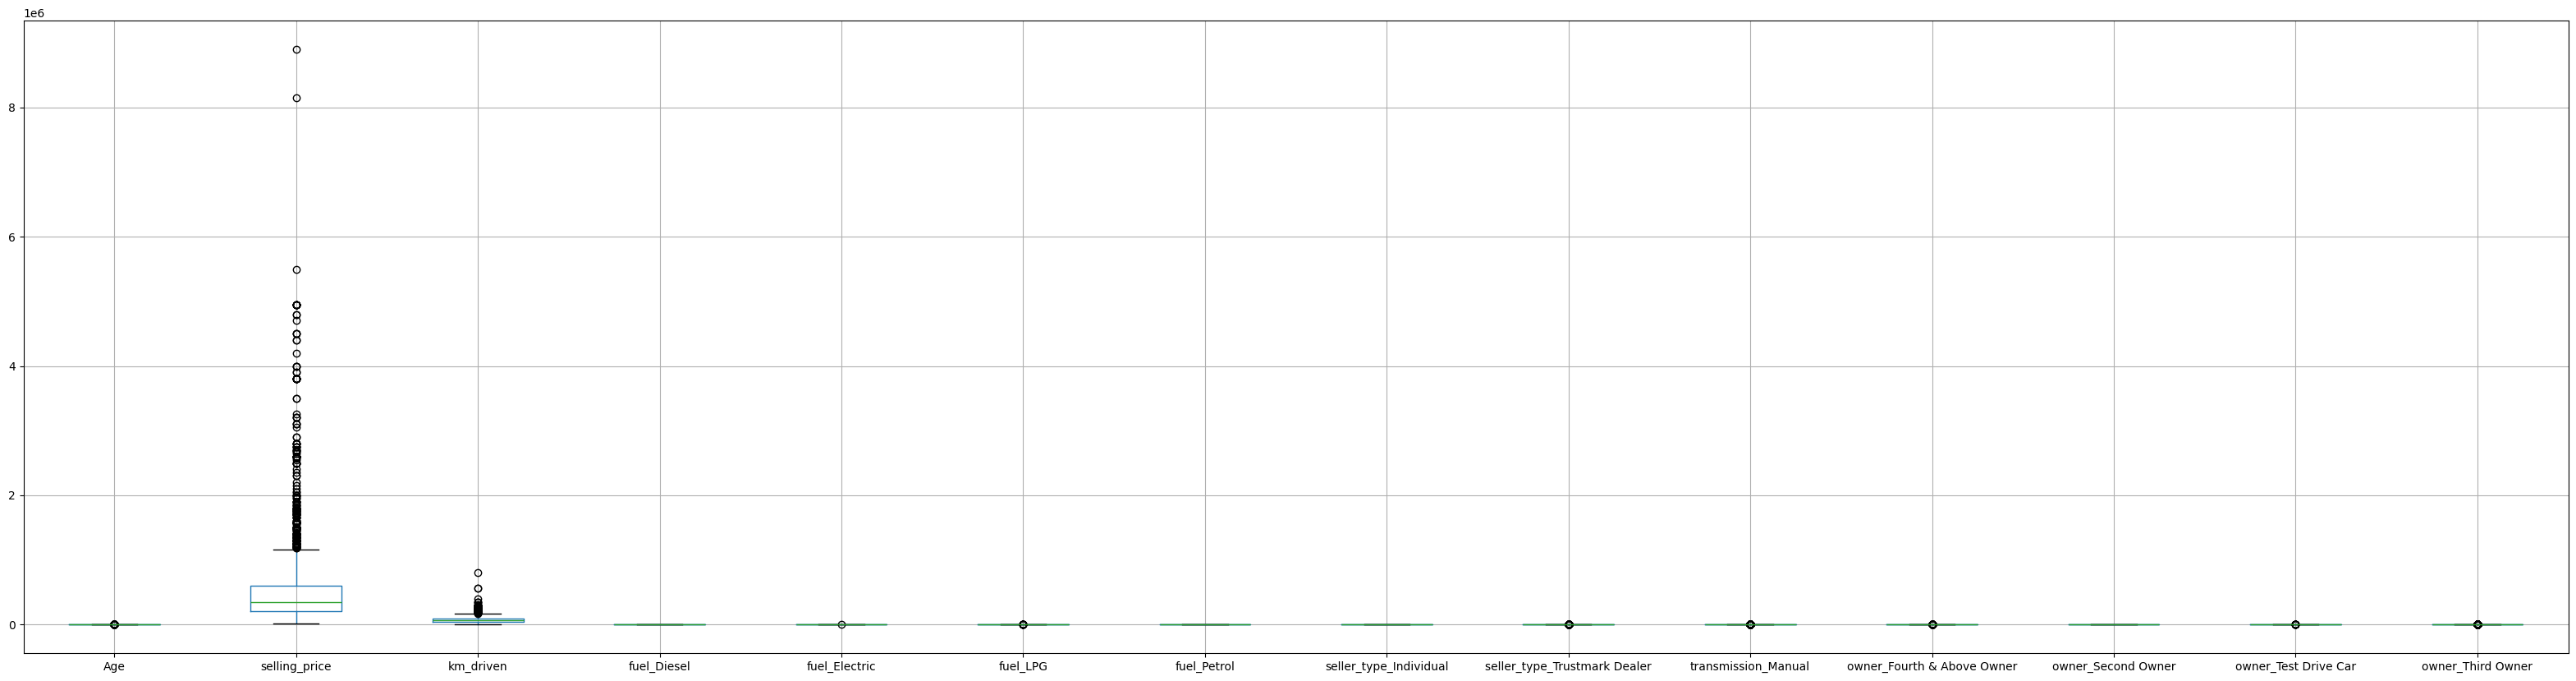

In [153]:

#one hot encoding porem passo o parametro drop first para que retire uma coluna do hot enconding 
# ex era para ter um transmission_Manual e automatic porem com esse parametro reduzo a uma so coluna evitando duas colunas que teoriacamente representam a msm coisa
dt = pd.get_dummies(dt, columns=['fuel','seller_type','transmission', 'owner'], drop_first=True, dtype='int')

dt.boxplot(figsize=(40,10))
display(dt.dtypes)


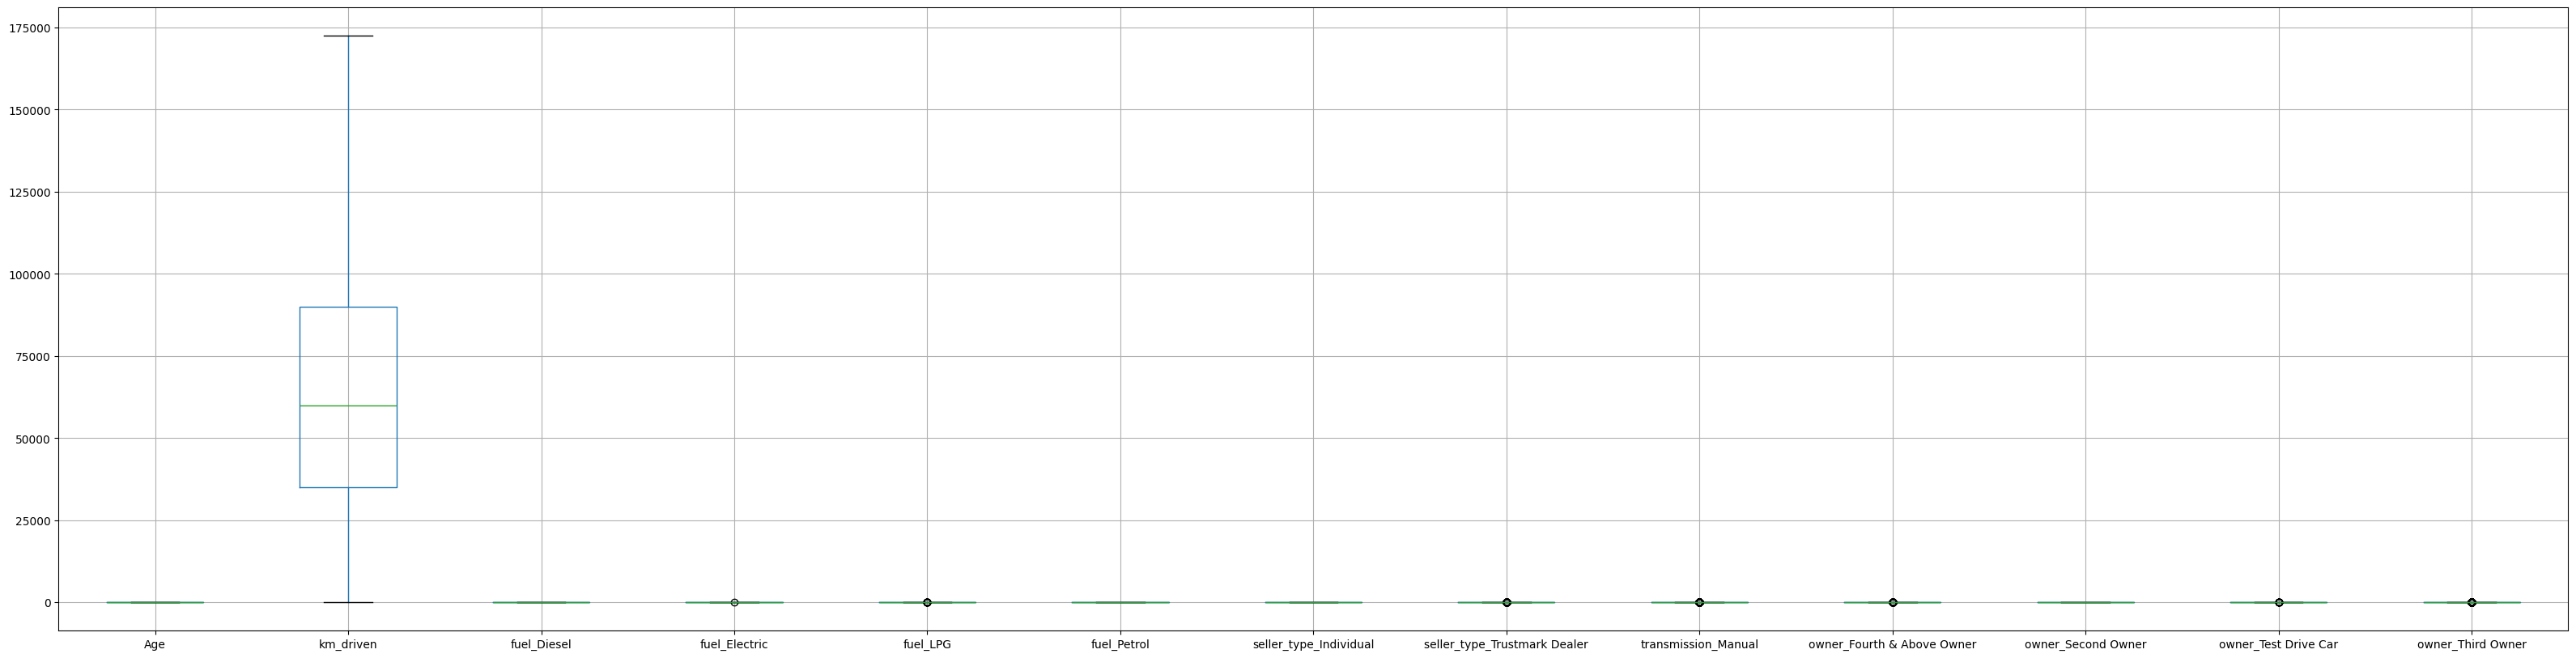

,Age,km_driven,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,17.0,70000,0,0,0,1,1,0,1,0,0,0,0
1,17.0,50000,0,0,0,1,1,0,1,0,0,0,0
2,12.0,100000,1,0,0,0,1,0,1,0,0,0,0
3,7.0,46000,0,0,0,1,1,0,1,0,0,0,0
4,10.0,141000,1,0,0,0,1,0,1,0,1,0,0


,Age,km_driven,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
count,4340.000000,4340.000000,4340.000000,4340.000000,4340.000000,4340.000000,4340.000000,4340.000000,4340.000000,4340.000000,4340.000000,4340.000000,4340.000000
mean,10.839977,64711.526267,0.496083,0.000230,0.005300,0.489171,0.747465,0.023502,0.896774,0.018664,0.254839,0.003917,0.070046
std,4.016018,39833.930145,0.500042,0.015179,0.072613,0.499940,0.434516,0.151510,0.304289,0.135349,0.435821,0.062471,0.255254
min,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,35000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,10.000000,60000.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,13.000000,90000.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,20.500000,172500.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [154]:
#remocao de outliers nas colunas X onde tem valores int64

dt2 = dt.copy()
dt2y = dt2.selling_price
dt2x = dt2.drop(columns=['selling_price', 'name'])
k = 1.5
for col in dt2x.select_dtypes('int64'):
# for col in dt2x.columns:
    Q1 = dt2x[col].quantile(0.25)
    Q3 = dt2x[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - k * IQR
    upper_bound = Q3 + k * IQR
    dt2x[col] = dt2x[col].clip(lower=Q1 - k * IQR, upper=Q3 + k * IQR)


# dt2.drop(index=[86,196],inplace=True)
# dt2.reset_index(drop=True,inplace=True)

dt2x.boxplot(figsize=(40,10))
plt.show()



display(dt2x.head())
display(dt2x.describe())


In [155]:
dt3 = pd.concat([
    dt2x.reset_index(drop=True),
    dt2y.reset_index(drop=True)
], axis=1)
display(dt3.head(5))
# dt3 = dt3.drop(columns=['name'])

,Age,km_driven,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,selling_price
0,17.0,70000,0,0,0,1,1,0,1,0,0,0,0,60000
1,17.0,50000,0,0,0,1,1,0,1,0,0,0,0,135000
2,12.0,100000,1,0,0,0,1,0,1,0,0,0,0,600000
3,7.0,46000,0,0,0,1,1,0,1,0,0,0,0,250000
4,10.0,141000,1,0,0,0,1,0,1,0,1,0,0,450000


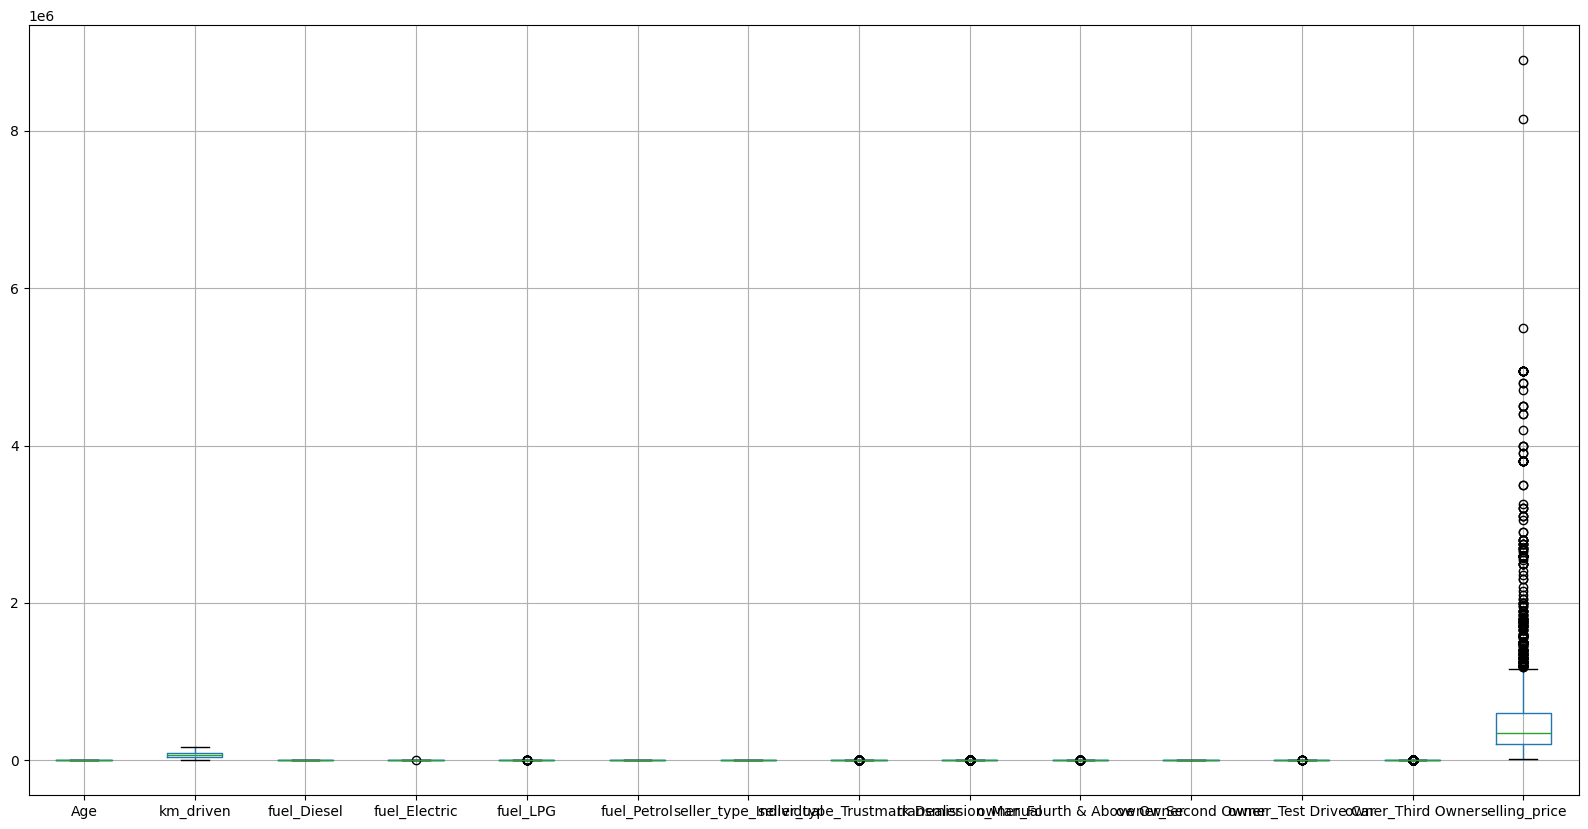

In [156]:

dt3.boxplot(figsize=(20,10))
plt.show()
# X_train, X_test, y_train, y_test = shuffle(dfx, dfy)

# regressaoLinear(X_train, y_train, X_test, y_test)
# redeNeural(X_train, y_train, X_test, y_test)

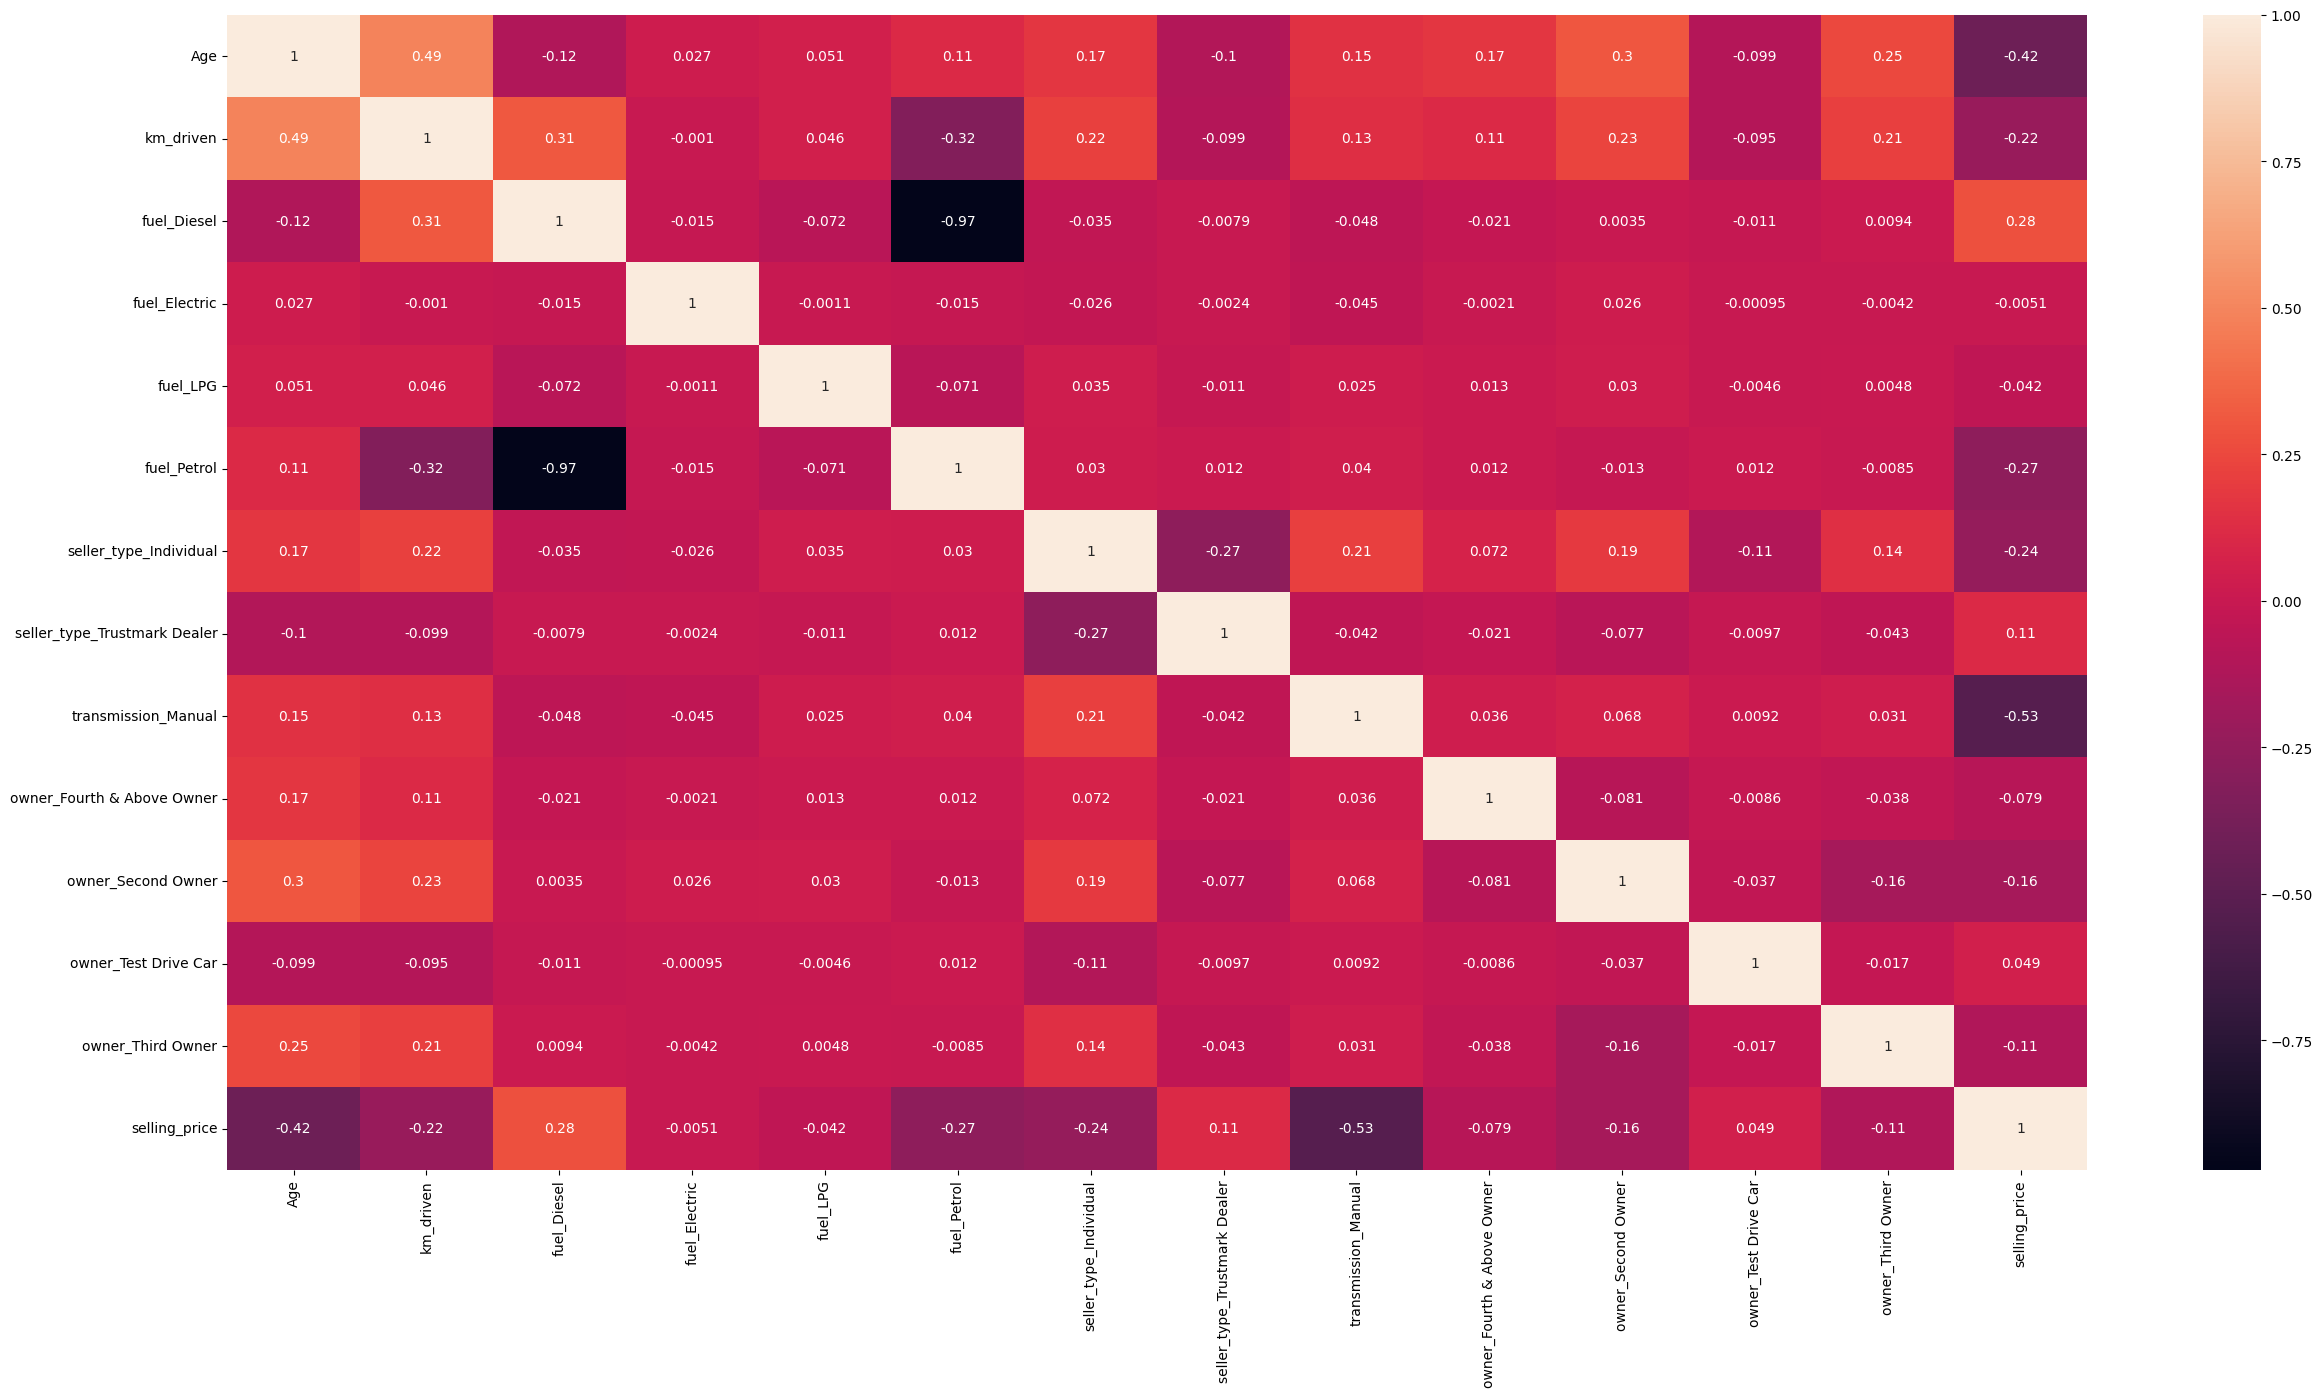

Age                      -0.423125
km_driven                -0.216714
fuel_Diesel               0.282947
fuel_Petrol              -0.269453
seller_type_Individual   -0.236798
transmission_Manual      -0.530205
selling_price             1.000000
Name: selling_price, dtype: float64


['Age',
 'km_driven',
 'fuel_Diesel',
 'fuel_Petrol',
 'seller_type_Individual',
 'transmission_Manual',
 'selling_price']

In [157]:

corr = dt3.corr()
plt.figure(figsize=(30, 15))  # Ajuste os valores conforme necessário
sns.heatmap(corr, annot=True,
        xticklabels=dt3.columns,
        yticklabels=dt3.columns,)
plt.show()




targetColumnCorr = corr.selling_price

#pega as colunas com correlacao maior que |0.20|
goodColumns = targetColumnCorr[(targetColumnCorr >= 0.20) | (targetColumnCorr <= -0.20)]
print(goodColumns)
columns = goodColumns.index.tolist()
# columns
display(columns)

newDataset = dt3.get(columns)

# newDataset = newDataset.drop(columns=['fuel_Petrol', 'transmission_Manual'])



In [158]:
#retiro os duplicados
display(newDataset.duplicated().sum())
display(len(newDataset))
display(len(newDataset.drop_duplicates()))
display(newDataset.head(3))



932

4340

3408

,Age,km_driven,fuel_Diesel,fuel_Petrol,seller_type_Individual,transmission_Manual,selling_price
0,17.0,70000,0,1,1,1,60000
1,17.0,50000,0,1,1,1,135000
2,12.0,100000,1,0,1,1,600000


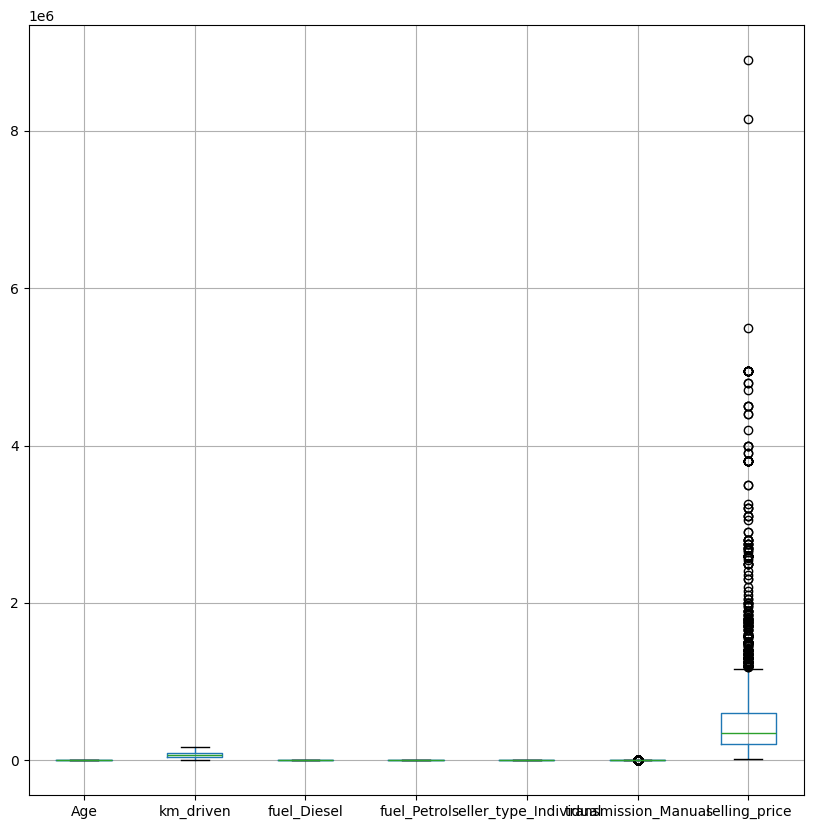

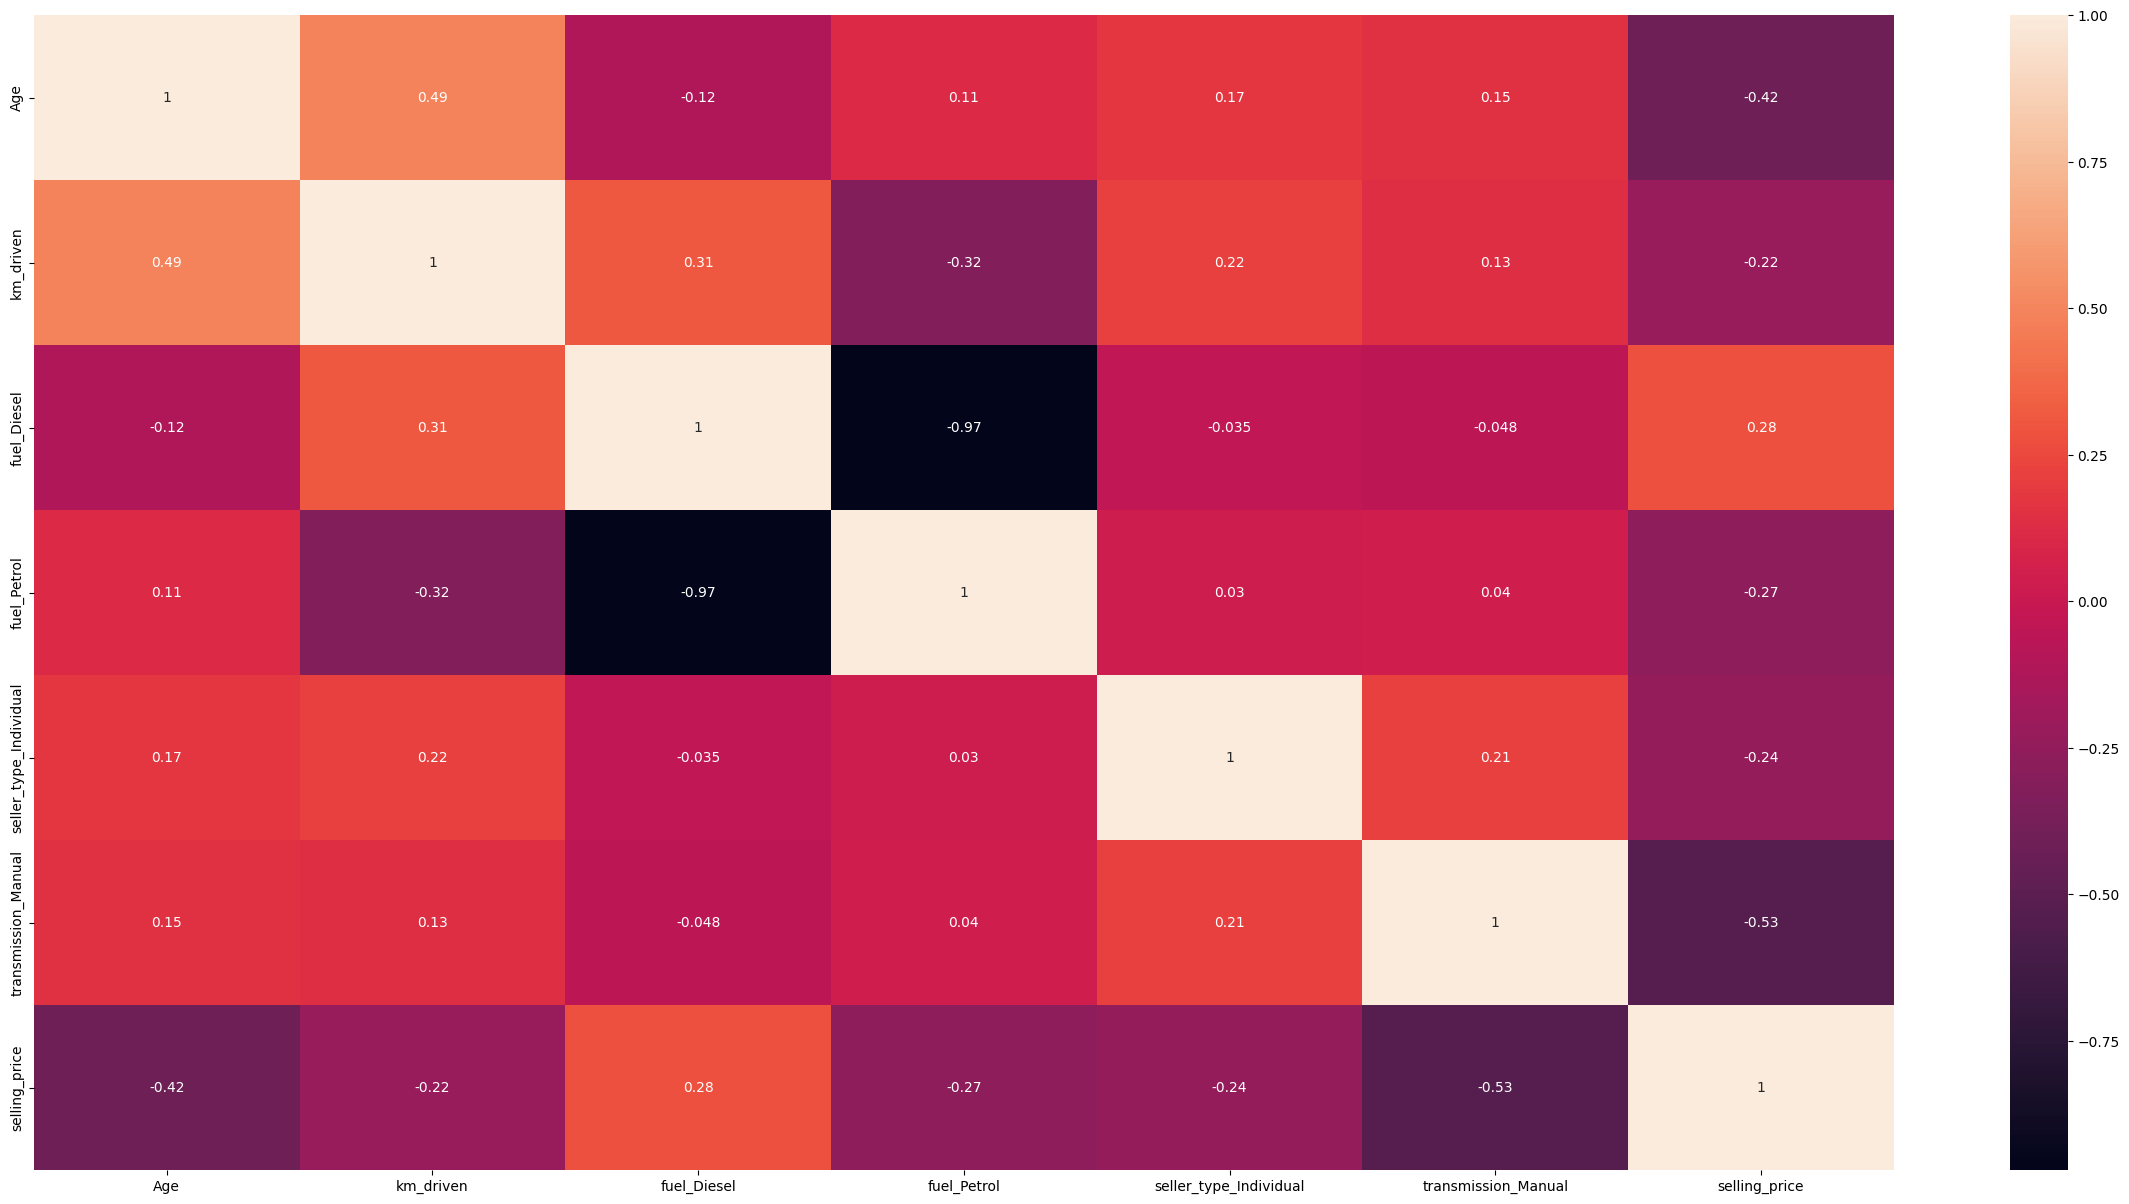

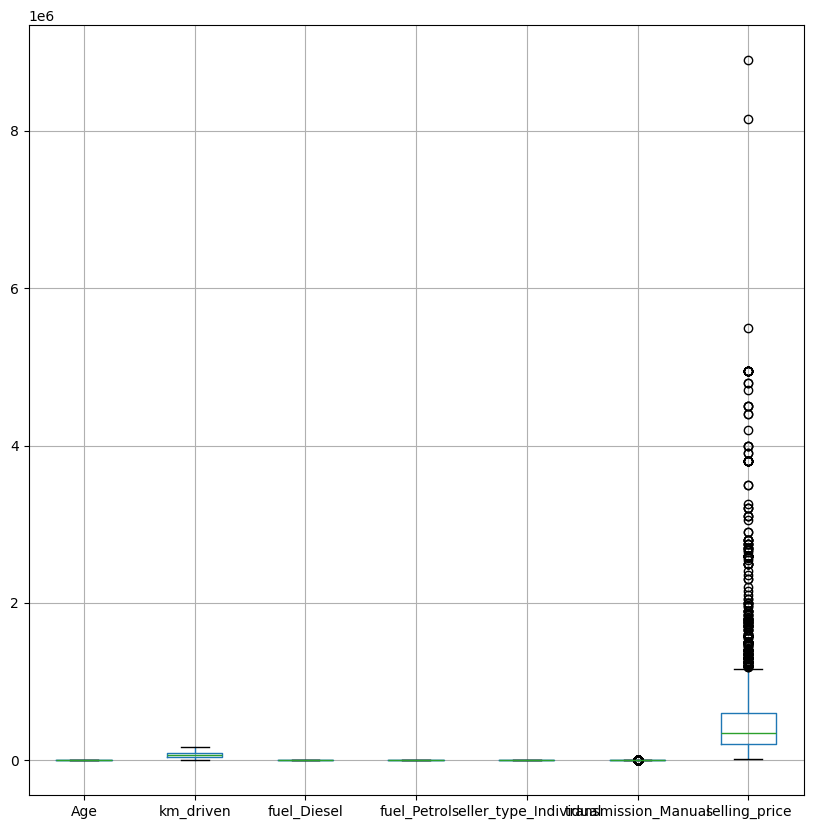

In [159]:

newDataset.boxplot(figsize=(10,10))
plt.show()

plt.figure(figsize=(30, 15))  # Ajuste os valores conforme necessário
sns.heatmap(newDataset.corr(), annot=True,
        xticklabels=newDataset.columns,
        yticklabels=newDataset.columns,)
plt.show()

# display(newDataset['transmission_Automatic'].())




newDataset.boxplot(figsize=(10,10))
plt.show()
newDatasetY = newDataset['selling_price']

#drop a coluna Y e a coluna petrol pois na faz sentido manter a coluna diesel e petrol
newDatasetX = newDataset.drop(columns=['selling_price', 'fuel_Petrol'])
newDatasetX = np.asarray(newDatasetX).astype('float32')


In [160]:
X_train, X_test, y_train, y_test = shuffle(newDatasetX, newDatasetY)



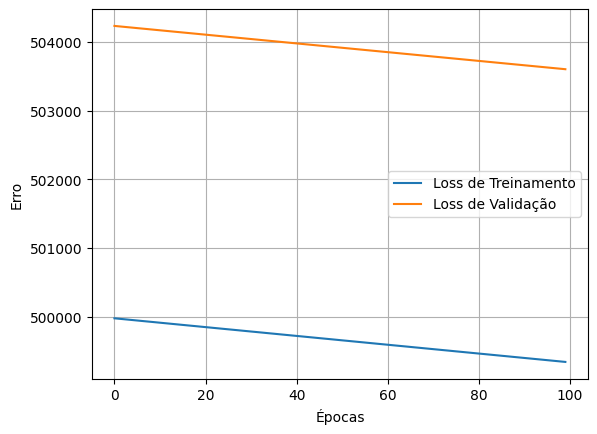

45/45 [==============================] - 0s 694us/step
Erro médio absoluto Regressão linear: 509310.2856188053
Erro MSE Regressao linear: 621227405428.0944


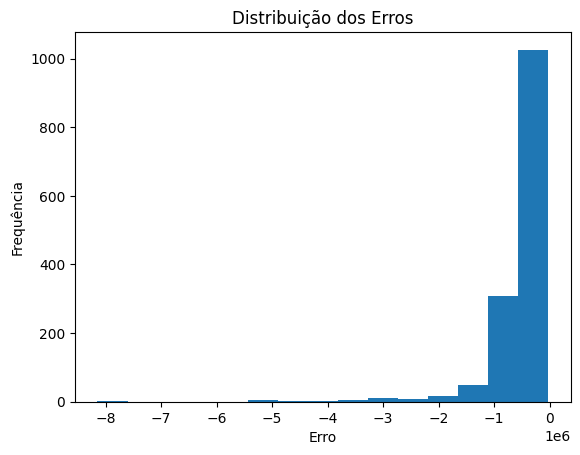

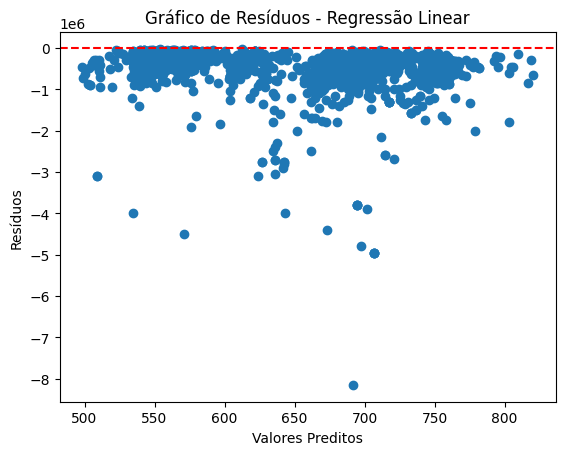

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_19 (Normaliz  (None, 5)                 11        
 ation)                                                          
                                                                 
 dense_46 (Dense)            (None, 10)                60        
                                                                 
 dense_47 (Dense)            (None, 7)                 77        
                                                                 
 dense_48 (Dense)            (None, 5)                 40        
                                                                 
 dense_49 (Dense)            (None, 1)                 6         
                                                                 
Total params: 194 (780.00 Byte)
Trainable params: 183 (732.00 Byte)
Non-trainable params: 11 (48.00 Byte)
_____________

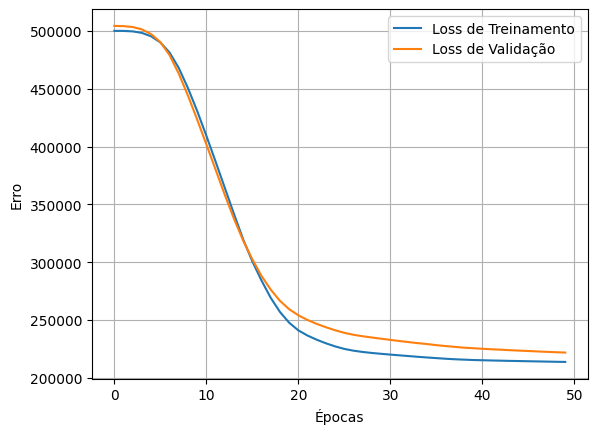

45/45 [==============================] - 0s 864us/step
Erro médio absoluto Rede neural: 227600.58447605302
Erro MSE Rede neural: 284292065642.394


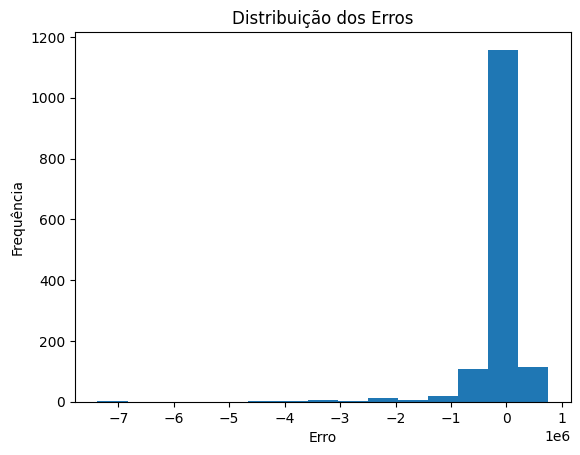

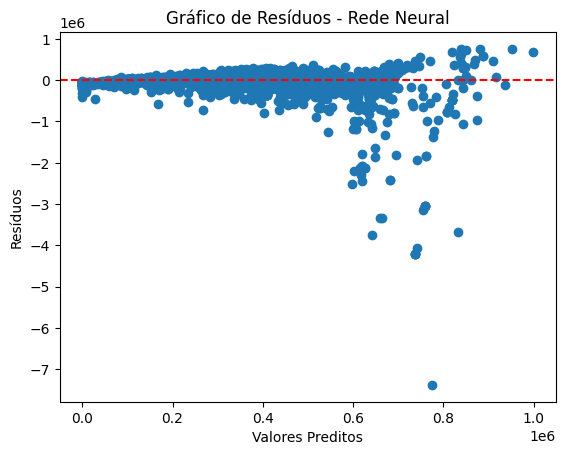

Test MSE Decision Tree = 139924136718.7973
Test MAE Decision Tree = 175950.1028825416


In [161]:



regressaoLinear(X_train, y_train, X_test, y_test)
redeNeural(X_train, y_train, X_test, y_test)
decisionTree(X_train, y_train, X_test, y_test)

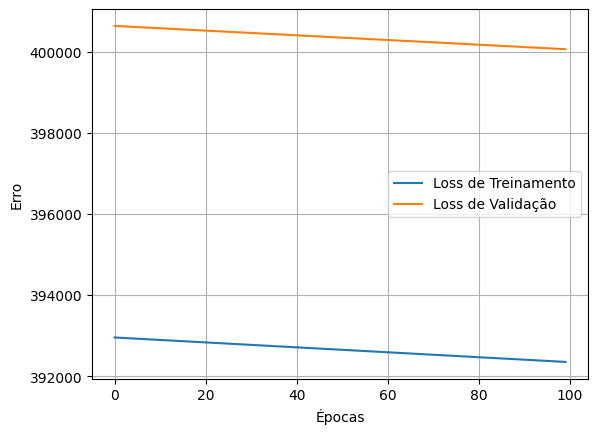

42/42 [==============================] - 0s 733us/step
Erro médio absoluto Regressão linear: 385931.1668288287
Erro MSE Regressao linear: 209443084129.3817


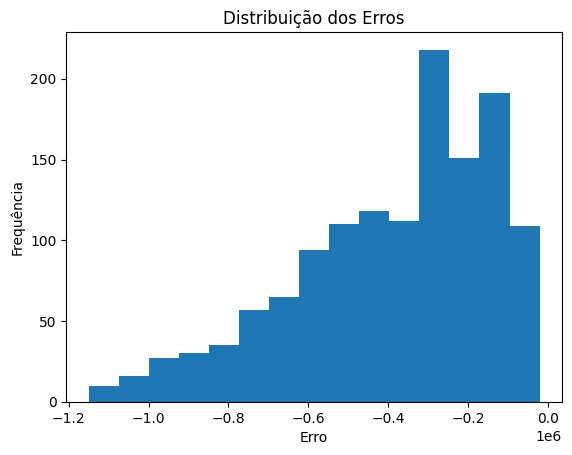

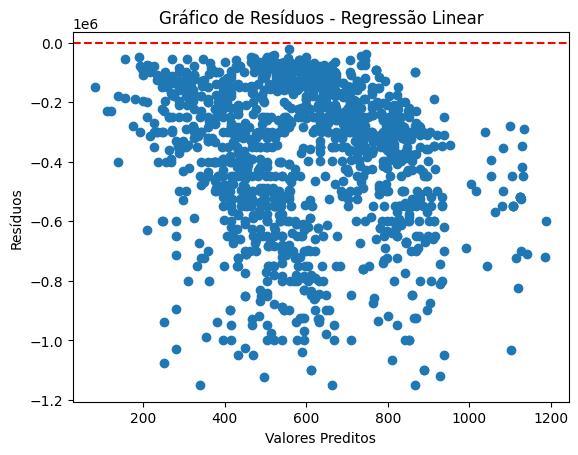

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_21 (Normaliz  (None, 5)                 11        
 ation)                                                          
                                                                 
 dense_51 (Dense)            (None, 10)                60        
                                                                 
 dense_52 (Dense)            (None, 7)                 77        
                                                                 
 dense_53 (Dense)            (None, 5)                 40        
                                                                 
 dense_54 (Dense)            (None, 1)                 6         
                                                                 
Total params: 194 (780.00 Byte)
Trainable params: 183 (732.00 Byte)
Non-trainable params: 11 (48.00 Byte)
_____________

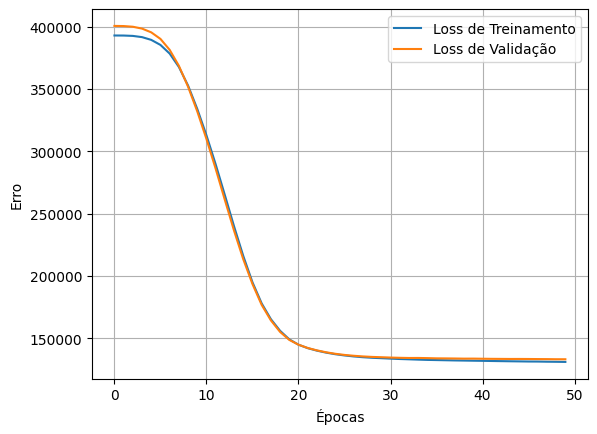

42/42 [==============================] - 0s 799us/step
Erro médio absoluto Rede neural: 130115.05584446387
Erro MSE Rede neural: 31405423205.212467


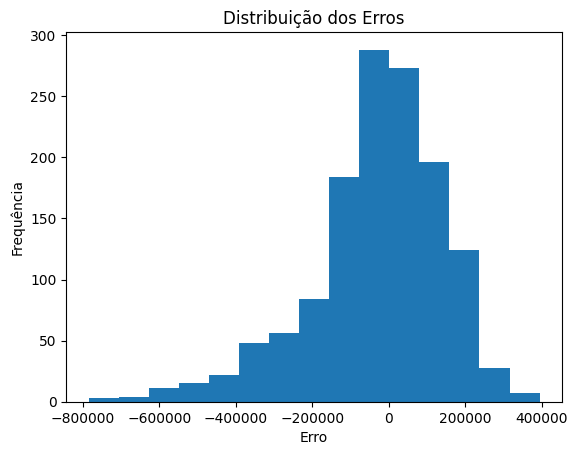

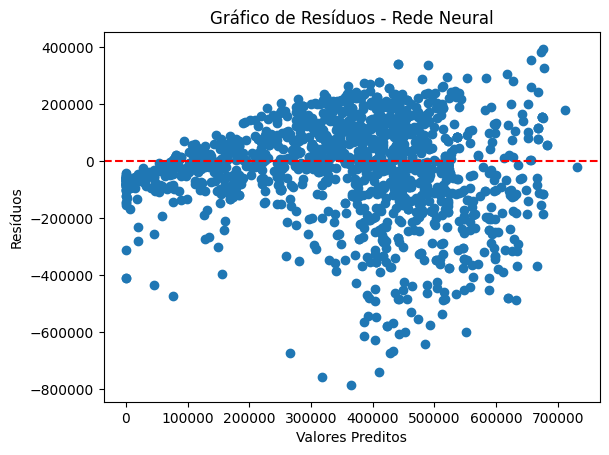

Test MSE Decision Tree = 28900392000.86701
Test MAE Decision Tree = 120374.60466450956


In [162]:
#faço o tratamento dos outliers da coluna de preco para treino apenas...sei que isso pode ter inpactos negativos mas para o meu caso melhorou a acuracia como um todo


Q1 = np.percentile(newDatasetY, 25)
Q3 = np.percentile(newDatasetY, 75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

mask = (newDatasetY >= lower_bound) & (newDatasetY <= upper_bound)
filtered_X = newDatasetX[mask]
filtered_Y = newDatasetY[mask]

X_train, X_test, y_train, y_test = shuffle(filtered_X, filtered_Y)

# Aplica os modelos
regressaoLinear(X_train, y_train, X_test, y_test)
redeNeural(X_train, y_train, X_test, y_test)
decisionTree(X_train, y_train, X_test, y_test)

In [163]:
dt['selling_price'].mean()

504127.3117511521